## Training MedMNist dataset with CNN for A multi Classification 

In [97]:
import torch
from torch import nn
from torch.utils.data import Dataset ,DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor , Lambda
import pandas as pd
import os
from torchvision.io import read_image
import medmnist
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim

In [98]:
data_path=os.path.join(os.getcwd(),'data/medmnist')

### Data Preprocessing

In [99]:
class MedmnistDataset(Dataset):
    def __init__(self,filename="",transform=None):
        self.data=np.load(filename+'/xdata.npy')
        self.targets=np.load(filename+'/ydata.npy')
        print(f'number of classes : {len(np.unique(self.targets))}')
        self.targets=np.squeeze(self.targets)
        self.transform=transform
        #self.data=torch.Tensor(self.data)
        #self.data=torch.unsqueeze(self.data,dim=1)
    def __len__(self):
        return len(self.targets)
    def __getitem__(self,idx):
        
        
        if self.transform:
            dt=self.transform(self.data[idx])
            
        return dt , self.targets[idx]
        
        

In [100]:
from torchvision.transforms import ToTensor
data=MedmnistDataset(data_path,transform=ToTensor())
data

number of classes : 11


In [101]:
## train / test / val datasets
train_size=18000
test_size=7221
train_dataset, test_dataset = torch.utils.data.random_split(data, [train_size, test_size])

In [102]:
len(train_dataset)

18000

In [103]:
len(test_dataset)

7221

In [104]:
## DataLoader
train_dataloader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_dataloader=DataLoader(test_dataset,batch_size=32,shuffle=True)


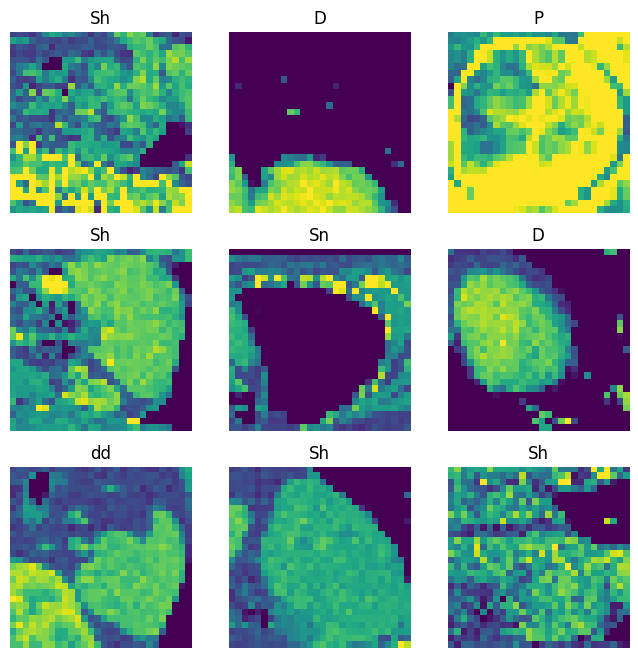

In [105]:
#visualize dataset
labels_map = {
    0: "x",
    1: "y",
    2: "P",
    3: "D",
    4: "C",
    5: "Sa",
    6: "Sh",
    7: "Sn",
    8: "Bag",
    9: "Ank",
    10:"dd",
    11:"fff"
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data), size=(1,)).item()
    img, label =data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="viridis")
plt.show()

In [74]:
for batch, (X, y) in enumerate(train_dataloader):
    print(X.shape)
    print(y.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size

torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size

torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size

In [85]:
#crrate a NN basic Model 
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [86]:
class lenet5v(nn.Module):
    def __init__(self):
        super(lenet5v, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.bn1 = nn.BatchNorm2d(6)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.bn2 = nn.BatchNorm2d(16)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(256, 120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 11)

    def forward(self, x):
        y = self.conv1(x)
        y = self.bn1(y)
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.bn2(y)
        y = self.relu2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0], -1)
        y = self.fc1(y)
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.relu4(y)
        y = self.fc3(y)
        return y
n_channels=1
n_classes=2
model= lenet5v()
model.to(device)    
# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
lr = 1e-2   
optimizer = optim.SGD(model.parameters(), lr=lr)

In [87]:
NUM_EPOCHS=100

### Train and visualize accuracy and training loss

In [88]:
train_loss=[]
test_loss=[]

In [89]:
# train

for epoch in range(NUM_EPOCHS):
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0
    loss_all=0
    total=0
    correct=0
    pred=0
    
    model.train()
    for batch, (inputs, targets) in enumerate(train_dataloader):
        # forward + backward + optimize
        #add inputs and target to cuda
        inputs,targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
      
        outputs = model(inputs)
        
        #targets = targets.to(torch.float32)
        loss = criterion(outputs, targets)
   
       
    
        
        loss.backward()
        optimizer.step()
    train_loss.append(loss.item())
    print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {loss.item()}')



Epoch [1/100], Loss: 1.047251582145691
Epoch [2/100], Loss: 0.8438268303871155
Epoch [3/100], Loss: 0.9570772647857666
Epoch [4/100], Loss: 0.6944319009780884
Epoch [5/100], Loss: 0.5458523035049438
Epoch [6/100], Loss: 1.483352780342102
Epoch [7/100], Loss: 0.653231680393219
Epoch [8/100], Loss: 0.5454498529434204
Epoch [9/100], Loss: 0.23279422521591187
Epoch [10/100], Loss: 0.2754164934158325
Epoch [11/100], Loss: 0.39800935983657837
Epoch [12/100], Loss: 0.32505324482917786
Epoch [13/100], Loss: 0.4050195813179016
Epoch [14/100], Loss: 0.44809362292289734
Epoch [15/100], Loss: 0.6942955255508423
Epoch [16/100], Loss: 0.5454839468002319
Epoch [17/100], Loss: 0.43634653091430664
Epoch [18/100], Loss: 0.3476179838180542
Epoch [19/100], Loss: 0.4288148283958435
Epoch [20/100], Loss: 0.2294834554195404
Epoch [21/100], Loss: 0.4846656620502472
Epoch [22/100], Loss: 0.2372213751077652
Epoch [23/100], Loss: 0.4564093351364136
Epoch [24/100], Loss: 0.33565282821655273
Epoch [25/100], Loss: 

## plot centralized , fedAvg , fed Prox losses with origin data split and disributions

In [92]:
#plot training loss of centralized learning 
train_loss

[1.047251582145691,
 0.8438268303871155,
 0.9570772647857666,
 0.6944319009780884,
 0.5458523035049438,
 1.483352780342102,
 0.653231680393219,
 0.5454498529434204,
 0.23279422521591187,
 0.2754164934158325,
 0.39800935983657837,
 0.32505324482917786,
 0.4050195813179016,
 0.44809362292289734,
 0.6942955255508423,
 0.5454839468002319,
 0.43634653091430664,
 0.3476179838180542,
 0.4288148283958435,
 0.2294834554195404,
 0.4846656620502472,
 0.2372213751077652,
 0.4564093351364136,
 0.33565282821655273,
 0.4134576618671417,
 0.3117191195487976,
 0.16348035633563995,
 0.460705041885376,
 0.24586385488510132,
 0.3574443757534027,
 0.28569144010543823,
 0.21472330391407013,
 0.4076698422431946,
 0.3702854514122009,
 0.2898450493812561,
 0.1762325018644333,
 0.31779131293296814,
 0.22058901190757751,
 0.2499386966228485,
 0.42733055353164673,
 0.2429429441690445,
 0.5463740229606628,
 0.1667482554912567,
 0.429878294467926,
 0.17505256831645966,
 0.0835888534784317,
 0.11364781856536865,
 0.

In [ ]:
fedavg_loss=[]
fedprox_loss=[]

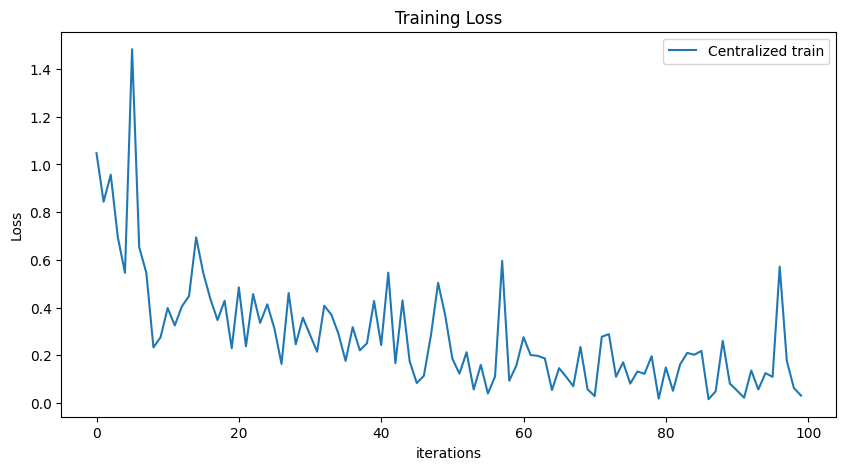

In [95]:
plt.figure(figsize=(10,5))
plt.title("Training Loss")
plt.plot(train_loss,label="Centralized train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [66]:
data=torch.Tensor([[-6.8598e-01, -1.0183e+01, -1.7664e+01, -1.0634e+01,  1.2974e+01,
          2.4633e+00,  1.2244e+01, -4.0763e+00, -1.0960e+01,  1.3755e+01,
          7.0897e+00]])
b,y=torch.max(data,1)
y

tensor([9])

In [67]:
data.size(0)

1

In [93]:
#test 
# Evaluation on the test set
correct = 0
total = 0
with torch.no_grad():
    for batch, (inputs, targets) in enumerate(test_dataloader):
        inputs,targets = inputs.to(device), targets.to(device)

        outputs = model(inputs)
        #print(outputs.data)
        _, predicted = torch.max(outputs.data, 1)
        #predicted is the indices of the max value in the outputs.data tensor that is a 11 probability of each class
        #print(f'pred : {predicted}' )
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 82.37%
